# Claire question plots
<a class="anchor" id="top"></a>
26/07/23 Plots created to answer questions asked by Claire in meeting on 19/07/23
+ [Peak field strength vs duration](#peakB-dur)
+ [Variables vs peak core temp](#dt-peakC)
+ [Mantle temperature at shut off](#lconvT-eta)
+ [Time of convective shut off](#conv-end)

## Load data

In [1]:
from scatter_function import make_scatter, make_sub_scatter
import sys
# setting path
sys.path.append('../')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as mcolors
import matplotlib as mpl

In [2]:
folder = 'Fullrun2'
data_in = pd.read_csv(f'../Results_combined/{folder}/all_sucess_info.csv',delimiter=',',skiprows=[1],header=0,index_col=False)
data_in['r']=data_in['r']/1e3 #rescale to km
data_in.fillna(0,inplace=True)
data = data_in.copy() #create copy of dataframe for filtering

## Filter data

In [3]:
filter = False #do you want to filter your data?

In [4]:
#filter for the variable you are interested in
var1 = 'rcmf' #variable of interest for these plots
varlab1 = 'rcmf' 
logval1 = False #should the yaxis of this variable be scaled logarithmically
var2 = 'frht'
varlab2 = 'frht'
logval2 = False 
save = False #do you want to save the figures
#fixed values of other quantities
eta0=1e21
r = 100
rcmf = 0.2
frht=0.02375
Xs_0 = 30.25
Fe0 = 1e-7
alpha_n = 25
etal = 10

In [5]:
if filter == True:
    #apply sucessive filters and skip chosen variables
    if (var1 != 'r') & (var2 !='r'):
        data = data[data['r']==r]
    if (var1 != 'Xs_0') & (var2 !='Xs_0'):
        data = data[data['Xs_0']==Xs_0]
    if (var1 != 'Fe0') & (var2 !='Fe0'):
        data = data[data['Fe0']==Fe0]
    if (var1 != 'rcmf') & (var2 !='rcmf'):
        data = data[data['rcmf']==rcmf]
    if (var1 != 'frht') & (var2 !='frht'):
        data = data[data['frht']==frht]
    if (var1 != 'eta0') & (var2 !='eta0'):
        data = data[data['eta0']==eta0]
    if (var1 != 'etal') & (var2 !='etal'):
        data = data[data['etal']==etal]
    if (var1 != 'alpha_n') & (var2 !='alpha_n'):
        data = data[data['alpha_n']==alpha_n]

# Plots

## Peak field strength vs duration <a class="anchor" id="peakB-dur"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

### Absolute values
May be filtered or not

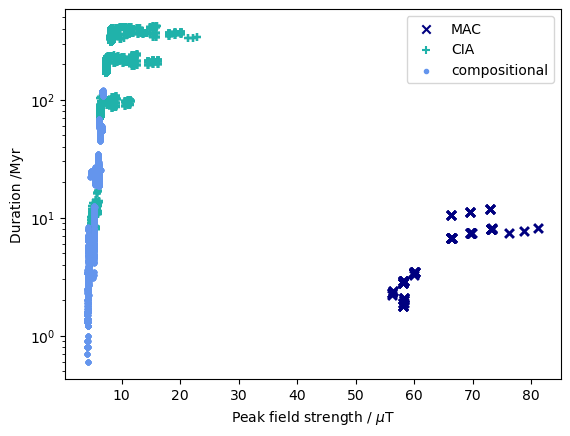

In [6]:
plt.figure() 
plt.scatter(data.loc[data['maxB_mac']!=0]['maxB_mac']/1e-6,data.loc[data['maxB_mac']!=0]['mac_dur'],label='MAC',marker='x',color='navy')
plt.scatter(data.loc[data['maxB_cia']!=0]['maxB_cia']/1e-6,data.loc[data['maxB_cia']!=0]['cia_dur'],label='CIA',marker='+',color='lightseagreen')
plt.scatter(data.loc[data['maxB_comp']!=0]['maxB_comp']/1e-6,data.loc[data['maxB_comp']!=0]['comp_dur'],label='compositional',marker='.',color='cornflowerblue')
plt.xlabel('Peak field strength / $\\mu$T')
plt.ylabel('Duration /Myr')
plt.yscale('log')
plt.legend()

### Normalised 

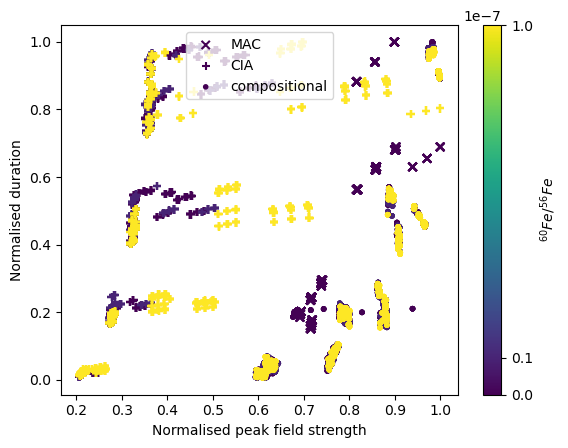

In [7]:
plt.figure() 
plt.scatter(data.loc[data['maxB_mac']!=0]['maxB_mac']/max(data['maxB_mac']),data.loc[data['maxB_mac']!=0]['mac_dur']/max(data['mac_dur']),label='MAC',marker='x',c=data.loc[data['maxB_mac']!=0]['Fe0'])#color='navy')
plt.scatter(data.loc[data['maxB_cia']!=0]['maxB_cia']/max(data['maxB_cia']),data.loc[data['maxB_cia']!=0]['cia_dur']/max(data['cia_dur']),label='CIA',marker='+',c=data.loc[data['maxB_cia']!=0]['Fe0'])#color='lightseagreen')
plt.scatter(data.loc[data['maxB_comp']!=0]['maxB_comp']/max(data['maxB_comp']),data.loc[data['maxB_comp']!=0]['comp_dur']/max(data['comp_dur']),label='compositional',marker='.',c=data.loc[data['maxB_comp']!=0]['Fe0'])#color='cornflowerblue')
plt.xlabel('Normalised peak field strength')
plt.ylabel('Normalised duration')
plt.legend()
plt.colorbar(ticks=[0,1e-8,1e-7],label='$^{60}Fe/^{56}Fe$')

### Filtering by radius and colouring by $^{60}$Fe -unfiltered dataset

Text(0.5, 0.98, 'Field strength vs duration')

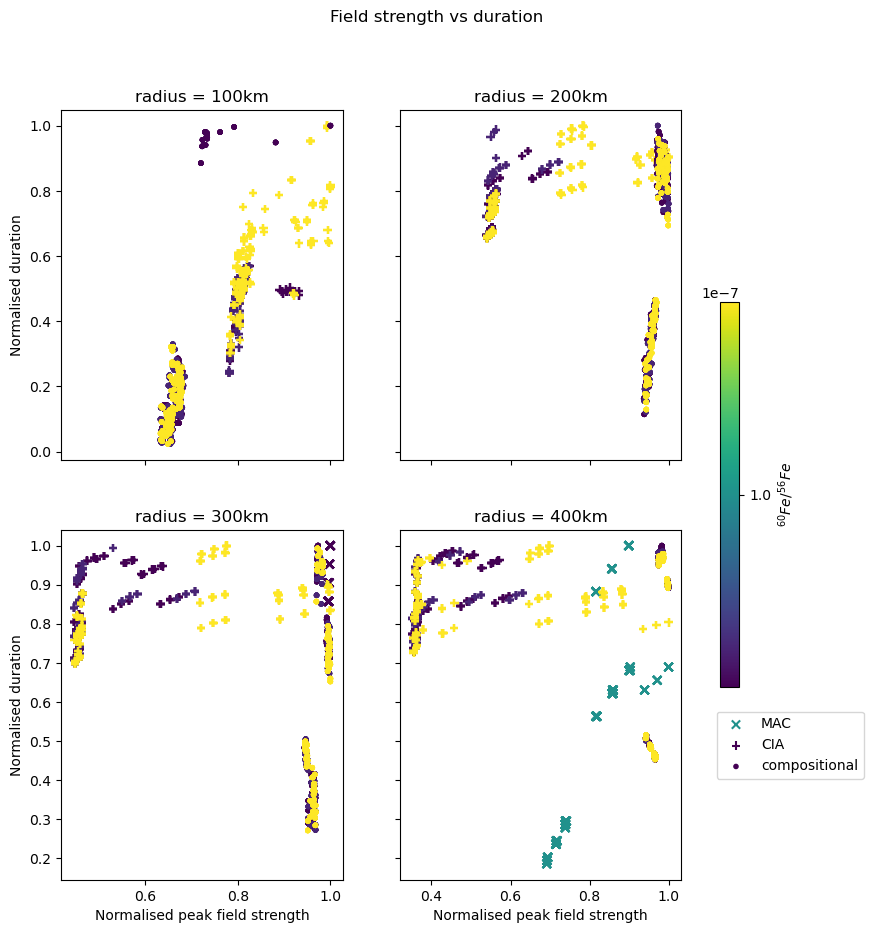

In [8]:
#normalised
rlist=[100,200,300,400] #radius [m]
row = [0,0,1,1]
col = [0,1,0,1]
fig, ax = plt.subplots(nrows=2,ncols=2,sharex='col',sharey='row',figsize=[10,10])
for irow, icol, rval in zip(row, col,rlist):
    data1 = data_in[(data_in['r']==rval)]
    p1 = ax[irow,icol].scatter(data1.loc[data1['maxB_mac']!=0]['maxB_mac']/max(data1['maxB_mac']),data1.loc[data1['maxB_mac']!=0]['mac_dur']/max(data1['mac_dur']),label='MAC',marker='x',c=data1.loc[data1['maxB_mac']!=0]['Fe0'])#color='navy')
    ax[irow,icol].scatter(data1.loc[data1['maxB_cia']!=0]['maxB_cia']/max(data1['maxB_cia']),data1.loc[data1['maxB_cia']!=0]['cia_dur']/max(data1['cia_dur']),label='CIA',marker='+',c=data1.loc[data1['maxB_cia']!=0]['Fe0'])#color='lightseagreen')
    ax[irow,icol].scatter(data1.loc[data1['maxB_comp']!=0]['maxB_comp']/max(data1['maxB_comp']),data1.loc[data1['maxB_comp']!=0]['comp_dur']/max(data1['comp_dur']),label='compositional',marker='.',c=data1.loc[data1['maxB_comp']!=0]['Fe0'])#color='cornflowerblue')
    ax[irow,icol].set_title(f'radius = {rval:.0f}km')
ax[1,0].set_xlabel('Normalised peak field strength')
ax[1,1].set_xlabel('Normalised peak field strength')
ax[0,0].set_ylabel('Normalised duration')
ax[1,0].set_ylabel('Normalised duration')
plt.legend(bbox_to_anchor=[1.1,0.5])
fig.colorbar(p1,label='$^{60}Fe/^{56}Fe$',ax=ax,ticks=[0,1e-8,1e-7],shrink=0.5)
fig.suptitle('Field strength vs duration')

## Variables vs peak core temperature <a class="anchor" id="dt-peakC"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

### Dynamo onset time vs peak core temperature

Text(0.5, 0.98, 'Dynamo onset time vs peak core temperature')

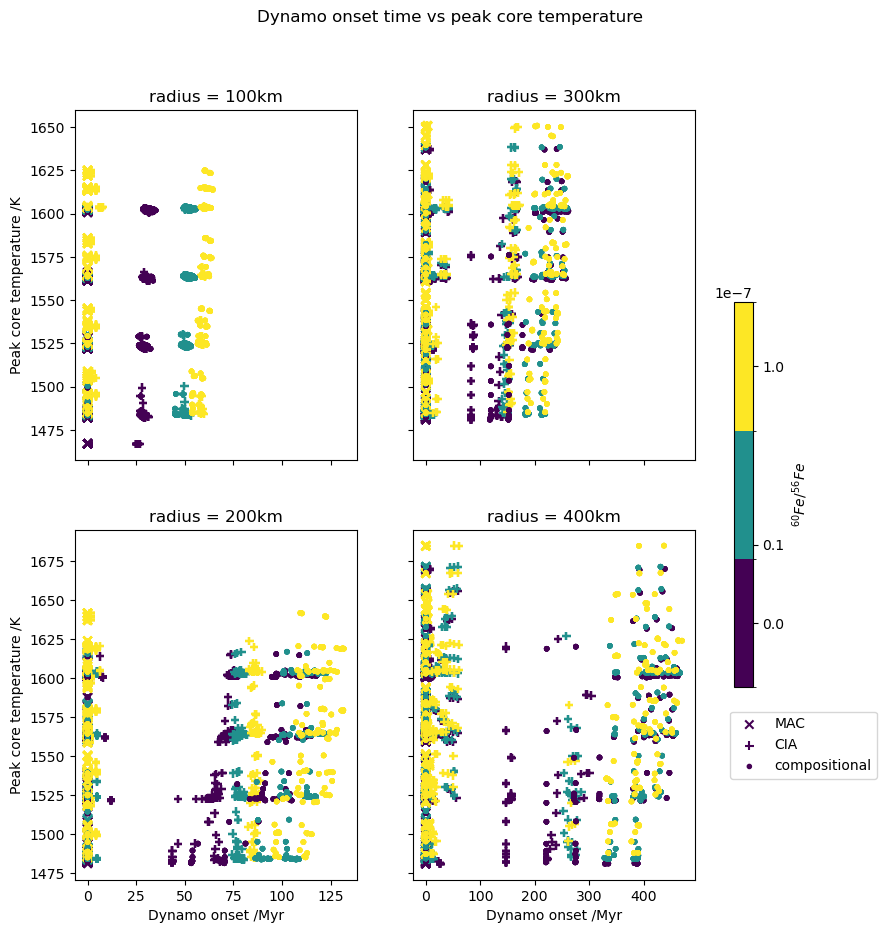

In [9]:
#normalised
rlist=[100,300,200,400] #radius [m]
row = [0,0,1,1]
col = [0,1,0,1]

#create colorbar
#cmap = (mpl.colors.ListedColormap(['royalblue','cyan','green', 'orange']))
cmap = plt.colormaps['viridis']
bounds = [-0.5e-8,0.5e-8,0.5e-7,1.5e-7]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots(nrows=2,ncols=2,sharex='col',sharey='row',figsize=[10,10])
for irow, icol, rval in zip(row, col,rlist):
    data1 = data_in[(data_in['r']==rval)]
    ax[irow,icol].scatter(data1['mac_on'],data1['peak_coreT'],label='MAC',marker='x',c=data1['Fe0'],cmap=cmap,norm=norm)
    ax[irow,icol].scatter(data1['cia_on'],data1['peak_coreT'],label='CIA',marker='+',c=data1['Fe0'],cmap=cmap,norm=norm)
    ax[irow,icol].scatter(data1['comp_on'],data1['peak_coreT'],label='compositional',marker='.',c=data1['Fe0'],cmap=cmap,norm=norm)
    ax[irow,icol].set_title(f'radius = {rval:.0f}km')
ax[1,0].set_xlabel('Dynamo onset /Myr')
ax[1,1].set_xlabel('Dynamo onset /Myr')
ax[0,0].set_ylabel('Peak core temperature /K')
ax[1,0].set_ylabel('Peak core temperature /K')
plt.legend(bbox_to_anchor=[1.1,0.5])
fig.colorbar(mpl.cm.ScalarMappable(cmap=cmap, norm=norm),ax=ax,ticks=[0,1e-8,1e-7],spacing='uniform',orientation='vertical',label='$^{60}Fe/^{56}Fe$',shrink=0.5)
fig.suptitle('Dynamo onset time vs peak core temperature')

### Onset of core convection vs peak core temperature

Text(0.5, 0.98, 'Onset of core convection vs peak core temperature')

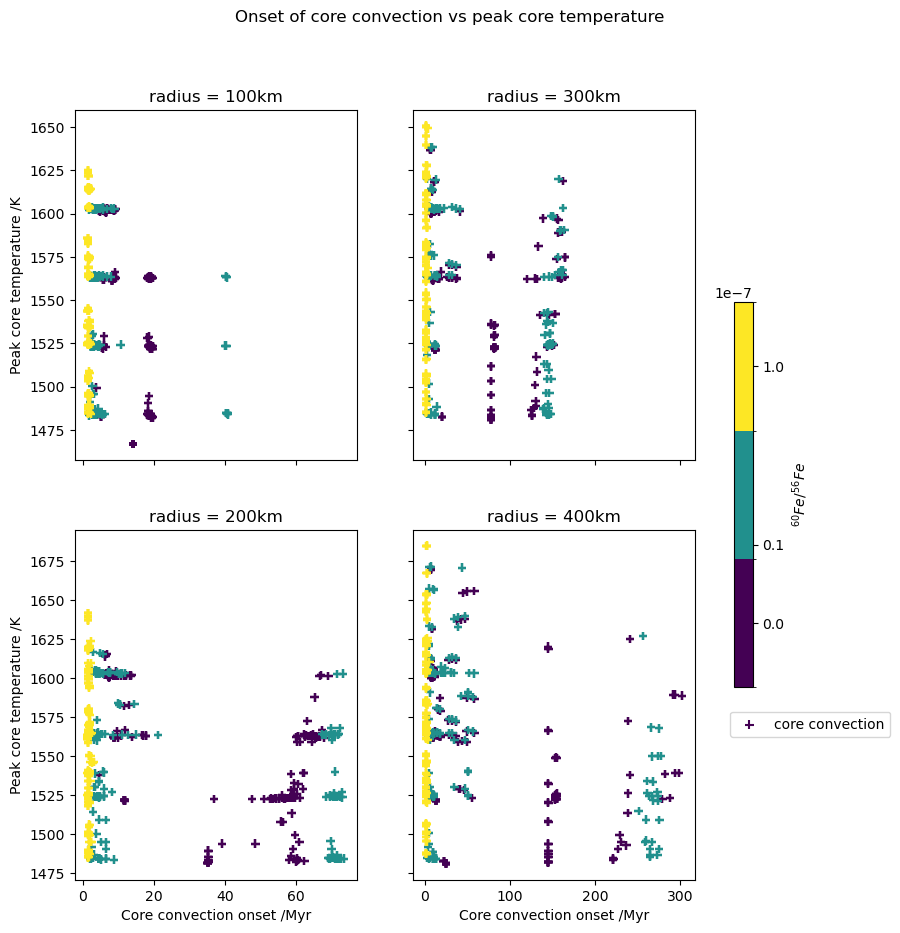

In [10]:
#normalised
rlist=[100,300,200,400] #radius [m]
row = [0,0,1,1]
col = [0,1,0,1]

#create colorbar
#cmap = (mpl.colors.ListedColormap(['royalblue','cyan','green', 'orange']))
cmap = plt.colormaps['viridis']
bounds = [-0.5e-8,0.5e-8,0.5e-7,1.5e-7]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots(nrows=2,ncols=2,sharex='col',sharey='row',figsize=[10,10])
for irow, icol, rval in zip(row, col,rlist):
    data1 = data_in[(data_in['r']==rval)]
    ax[irow,icol].scatter(data1['coreconv_on'],data1['peak_coreT'],label='core convection',marker='+',c=data1['Fe0'],cmap=cmap,norm=norm)
    ax[irow,icol].set_title(f'radius = {rval:.0f}km')
ax[1,0].set_xlabel('Core convection onset /Myr')
ax[1,1].set_xlabel('Core convection onset /Myr')
ax[0,0].set_ylabel('Peak core temperature /K')
ax[1,0].set_ylabel('Peak core temperature /K')
plt.legend(bbox_to_anchor=[1.1,0.5])
fig.colorbar(mpl.cm.ScalarMappable(cmap=cmap, norm=norm),ax=ax,ticks=[0,1e-8,1e-7],spacing='uniform',orientation='vertical',label='$^{60}Fe/^{56}Fe$',shrink=0.5)
fig.suptitle('Onset of core convection vs peak core temperature')

### Peak core temperature vs rcmf

Text(0.5, 0.98, 'rcmf vs peak core temperature')

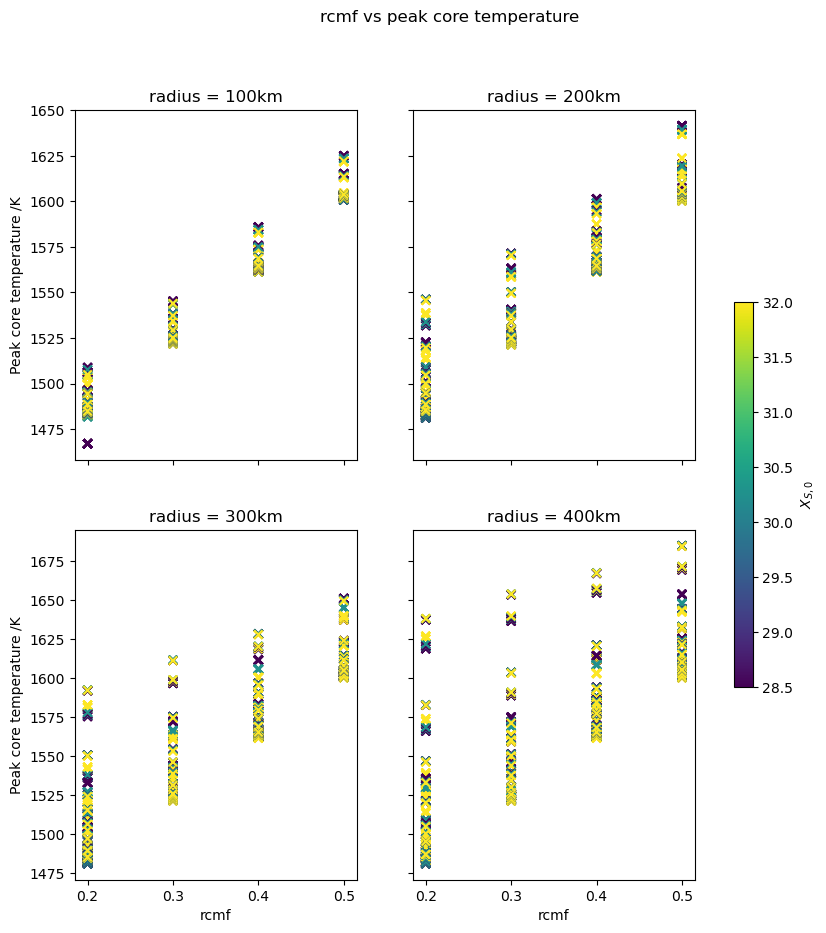

In [15]:
#normalised
rlist=[100,200,300,400] #radius [m]
row = [0,0,1,1]
col = [0,1,0,1]
var ='rcmf'
varlabel ='rcmf'
colour = 'Xs_0'
collabel = '$X_{S,0}$'

fig, ax = plt.subplots(nrows=2,ncols=2,sharex='col',sharey='row',figsize=[10,10])
for irow, icol, rval in zip(row, col,rlist):
    data1 = data_in[(data_in['r']==rval)]
    p1=ax[irow,icol].scatter(data1[var],data1['peak_coreT'],marker='x',c=data1[colour])
    ax[irow,icol].set_title(f'radius = {rval:.0f}km')
ax[1,0].set_xlabel(varlabel)
ax[1,1].set_xlabel(varlabel)
ax[0,0].set_ylabel('Peak core temperature /K')
ax[1,0].set_ylabel('Peak core temperature /K')
fig.colorbar(p1,ax=ax,label=collabel,shrink=0.5)
fig.suptitle(f'{varlabel} vs peak core temperature')

## Mantle temperature at convective shut off vs $\eta_0$ <a class="anchor" id="lconvT-eta"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

Text(0, 0.5, 'Temperature at cessation of convection')

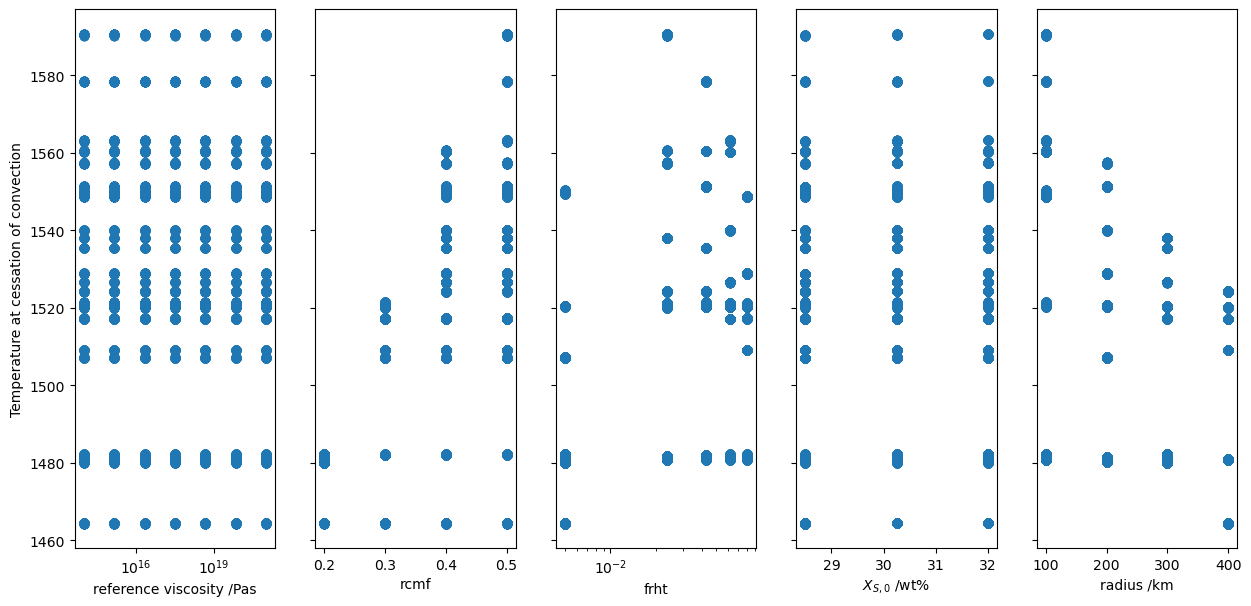

In [12]:
varlist =['eta0','rcmf','frht','Xs_0','r']
varlabel =['reference viscosity /Pas','rcmf','frht','$X_{S,0}$ /wt%','radius /km']
i=0
fig, ax = plt.subplots(nrows=1,ncols=len(varlist),sharey=True,figsize=[15,7]) 
for var, label in zip(varlist,varlabel):
    ax[i].scatter(data_in[var],data_in['lconv_T'])
    if (i==0) | (i==2):
        ax[i].set_xscale('log')
    ax[i].set_xlabel(label)
    i=i+1
ax[0].set_ylabel('Temperature at cessation of convection')

This makes sense as $Ra = \frac{\alpha g \Delta T d^3}{\kappa \eta}$ so larger bodies can convect for longer and bodies with lower viscosity (lower $\phi_{rcmf}$) can convect for longer.

## Time of convective shut off <a class="anchor" id="conv-end"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

Text(0, 0.5, 'Duration of buffering /Myr')

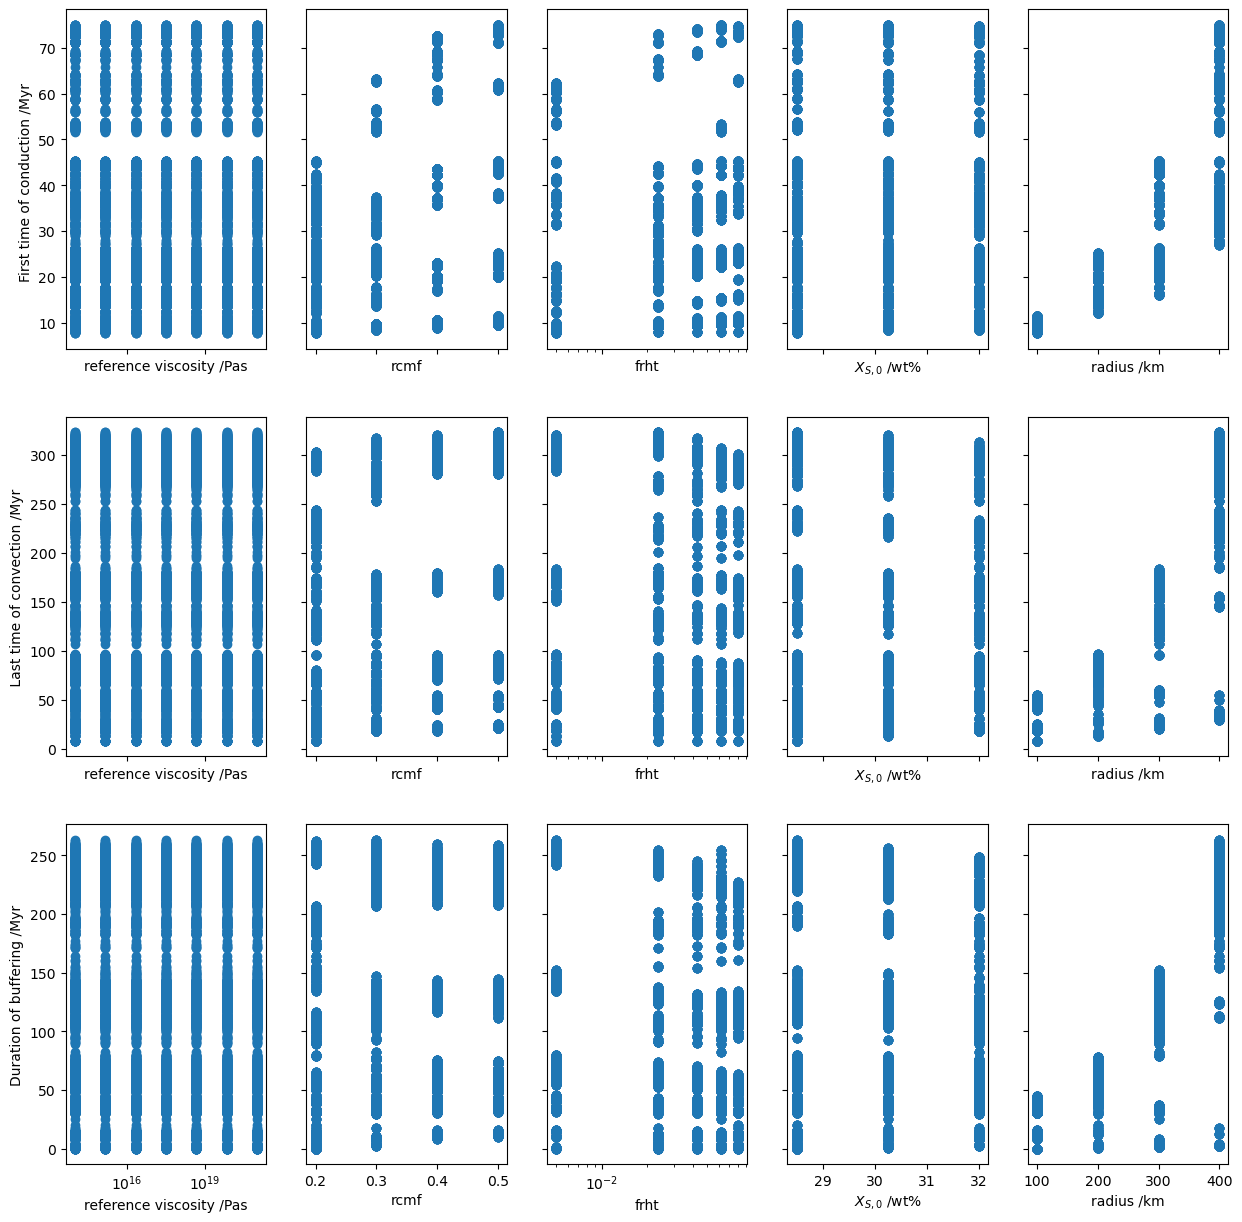

In [13]:
varlist =['eta0','rcmf','frht','Xs_0','r']
varlabel =['reference viscosity /Pas','rcmf','frht','$X_{S,0}$ /wt%','radius /km']

fig, ax = plt.subplots(nrows=3,ncols=len(varlist),sharey='row',sharex='col',figsize=[15,15]) 
#first time of conduction
i=0
for var, label in zip(varlist,varlabel):
    ax[0,i].scatter(data_in[var],data_in['lconv_t'])
    if (i==0) | (i==2):
        ax[0,i].set_xscale('log')
    ax[0,i].set_xlabel(label)
    i=i+1
ax[0,0].set_ylabel('First time of conduction /Myr ')
#last time of convection
i=0
for var, label in zip(varlist,varlabel):
    ax[1,i].scatter(data_in[var],data_in['fcond_t'])
    if (i==0) | (i==2):
        ax[1,i].set_xscale('log')
    ax[1,i].set_xlabel(label)
    i=i+1
ax[1,0].set_ylabel(' Last time of convection /Myr ')
#duration of buffering
i=0
for var, label in zip(varlist,varlabel):
    ax[2,i].scatter(data_in[var],data_in['fcond_t']-data_in['lconv_t'])
    if (i==0) | (i==2):
        ax[2,i].set_xscale('log')
    ax[2,i].set_xlabel(label)
    i=i+1
ax[2,0].set_ylabel('Duration of buffering /Myr')

Again radius seems to be strongest control here. Now see filtered version below

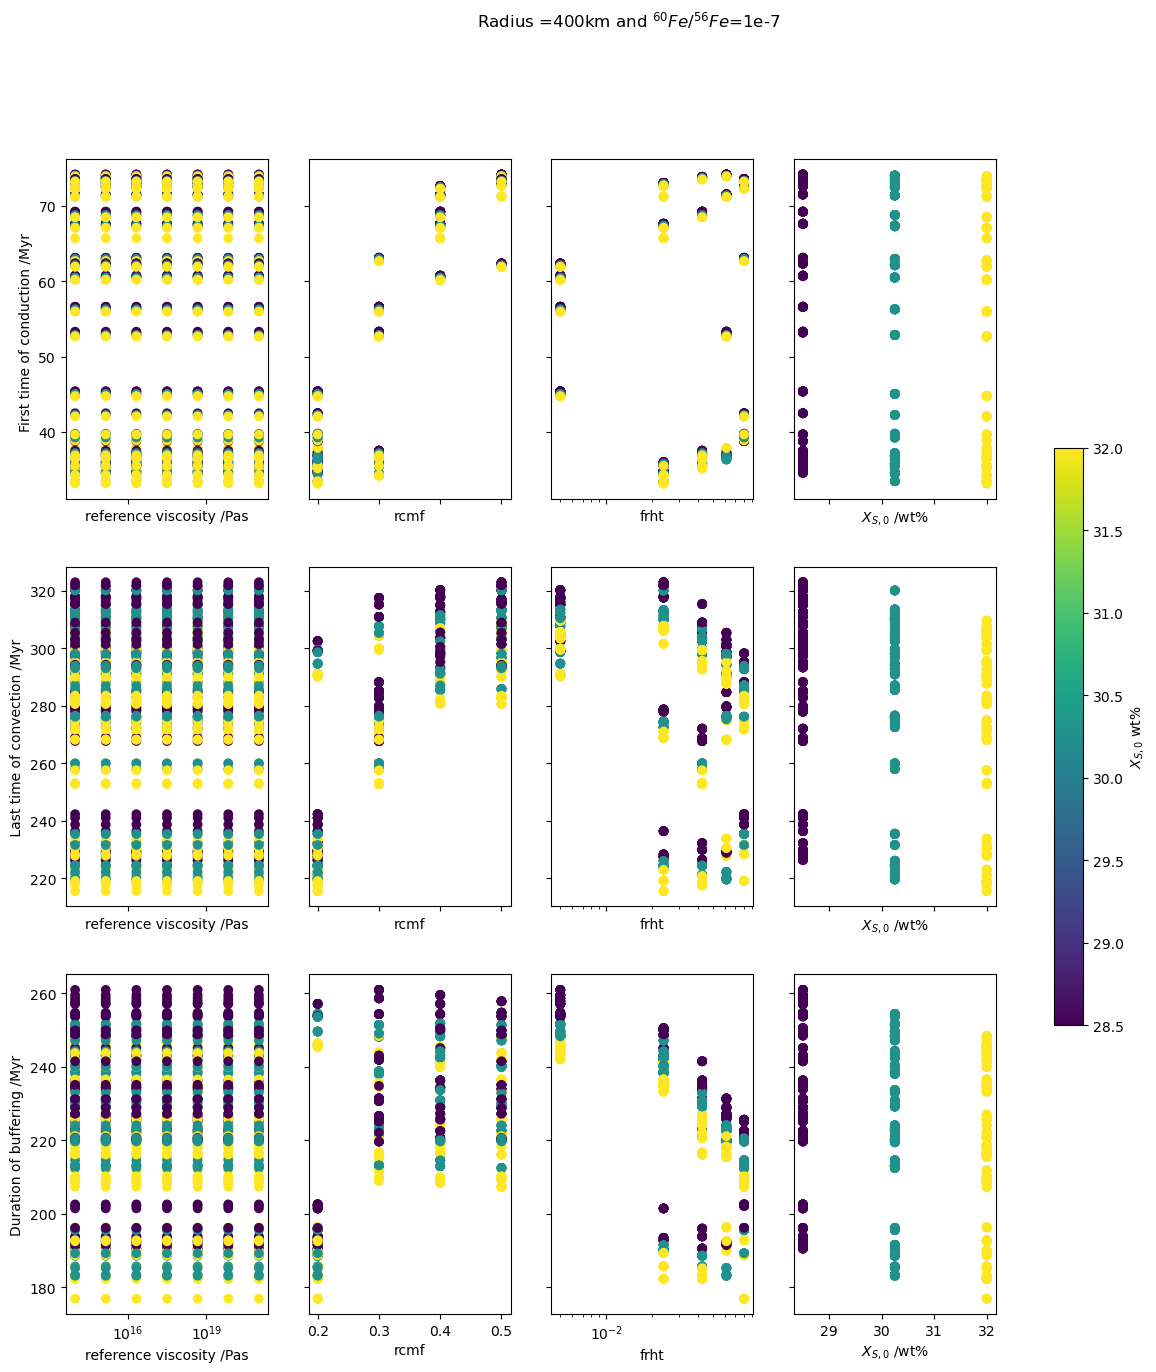

In [14]:
varlist =['eta0','rcmf','frht','Xs_0']
varlabel =['reference viscosity /Pas','rcmf','frht','$X_{S,0}$ /wt%']
col = 'Xs_0' #variable to put on colorbar
collabel = '$X_{S,0}$ wt%'
data2 = data_in[(data_in['r']==400)&(data_in['Fe0']==1e-7)]
fig, ax = plt.subplots(nrows=3,ncols=len(varlist),sharey='row',sharex='col',figsize=[15,15]) 
fig.suptitle('Radius =400km and $^{60}Fe/^{56}Fe$=1e-7')
#first time of conduction
i=0
for var, label in zip(varlist,varlabel):
    ax[0,i].scatter(data2[var],data2['lconv_t'],c=data2[col])
    if (i==0) | (i==2):
        ax[0,i].set_xscale('log')
    ax[0,i].set_xlabel(label)
    i=i+1
ax[0,0].set_ylabel('First time of conduction /Myr ')
#last time of convection
i=0
for var, label in zip(varlist,varlabel):
    ax[1,i].scatter(data2[var],data2['fcond_t'],c=data2[col])
    if (i==0) | (i==2):
        ax[1,i].set_xscale('log')
    ax[1,i].set_xlabel(label)
    i=i+1
ax[1,0].set_ylabel(' Last time of convection /Myr ')
#duration of buffering
i=0
for var, label in zip(varlist,varlabel):
    p1 = ax[2,i].scatter(data2[var],data2['fcond_t']-data2['lconv_t'],c=data2[col])
    if (i==0) | (i==2):
        ax[2,i].set_xscale('log')
    ax[2,i].set_xlabel(label)
    i=i+1
ax[2,0].set_ylabel('Duration of buffering /Myr')
fig.colorbar(p1,label=collabel,ax=ax,shrink=0.5)